# $B+ -> \Lambda_{bar} p K+ K+$

In [22]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import vector  ## added by mds
import awkward as ak
import iminuit
from iminuit import Minuit
from fit_classes import *
from utils import *

In [23]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [24]:
# Use LHCb style for plots
#import mplhep as hep
#plt.style.use(hep.style.CMS)
#plt.rcParams["figure.figsize"] = (8,6)
#plt.rcParams['font.family'] = 'DejaVu Sans' # Change 'DejaVu Sans' to a font installed on your system


## All data 

In [25]:
available_trees = ['B2L0pbarpippim', 'B2L0pbarpippip', 'B2L0pbarKmpip', 'B2L0pbarKppip', 
                   'B2L0pbarKppim', 'B2L0pbarKpKm', 'B2L0pbarpp', 'B2L0pbarKpKp']

# Show available decay trees
print("Available decay trees:")
for idx, tree in enumerate(available_trees, 1):
    print(f"{idx}. {tree}")

# Get a physicist input for selected tree
tree_idx = int(input("Please select the number of your desired decay tree: ")) - 1
decay_tree = available_trees[tree_idx]

base_path = '/share/lazy/Bu2LambdaPHH/NTuples/RD/'
file_names = ['L0phh_18MU.root', 'L0phh_18MD.root', 'L0phh_17MU.root', 'L0phh_17MD.root', 
              'L0phh_16MU.root', 'L0phh_16MD.root', 'L0phh_15MU.root', 'L0phh_15MD.root']

data = [f'{base_path}{file_name}:{decay_tree}/DecayTree' for file_name in file_names]

# print what the user has selected
print(f"Selected decay tree: {decay_tree}")

Available decay trees:
1. B2L0pbarpippim
2. B2L0pbarpippip
3. B2L0pbarKmpip
4. B2L0pbarKppip
5. B2L0pbarKppim
6. B2L0pbarKpKm
7. B2L0pbarpp
8. B2L0pbarKpKp
Selected decay tree: B2L0pbarKpKp


## Specific Data choice

In [ ]:
base_path = '/share/lazy/Bu2LambdaPHH/NTuples/RD/'

available_trees = ['B2L0pbarpippim', 'B2L0pbarpippip', 'B2L0pbarKmpip', 'B2L0pbarKppip', 
                   'B2L0pbarKppim', 'B2L0pbarKpKm', 'B2L0pbarpp', 'B2L0pbarKpKp']

available_years = ['15','16','17','18']
available_magnet = ['MU', 'MD']

for idx, year in enumerate(available_years, 1):
    print(f"{idx}. {year}")
year_idx = int(input("Please select the year: ")) - 1  # Subtract 1 from user input
year = available_years[year_idx]


# show available magnet choices
print("Available magnet directions:")
for idx, magnet in enumerate(['MU', 'MD'], 1):
    print(f"{idx}. {magnet}")
magnet_idx = int(input("Please select the number of your desired magnet: ")) - 1  # Subtract 1 from user input
magnet_direction = available_magnet[magnet_idx]

# Show available decay trees
print("Available decay trees:")
for idx, tree in enumerate(available_trees, 1):
    print(f"{idx}. {tree}")

# Get a physicist input for selected tree
tree_idx = int(input("Please select the number of your desired decay tree: ")) - 1  # Subtract 1 from user input
decay_tree = available_trees[tree_idx]

file_name = get_file_name(year, magnet_direction)

data = [f'{base_path}{file_name}:{decay_tree}/DecayTree']

#print(f"Selected decay tree: {decay_tree}")
#print(f"Selected year: {year}")
#print(f"Selected magnet direction: {magnet_direction}")

# combine the three print lines
print(f"You have chosen to analyse {decay_tree} for 20{year} data in the {magnet_direction} field.")


1. 15
2. 16
3. 17
4. 18


IndexError: list index out of range

Run the following regardless of data choice

In [26]:
plots_dir = f'plots/{decay_tree}'
if plots_dir is not None:
    import os
    os.makedirs(plots_dir, exist_ok=True)

In [27]:
arrs = uproot.concatenate(data)
print("Concantenated arrays are ready:")
print(f"Number of events: {len(arrs)}")
#print(f"Number of variables: {len(arrs[0])}")


Concantenated arrays are ready:
Number of events: 11705


In [28]:
h1_P = arrs['h1_P']
h1_PT = arrs['h1_PT']
h1_PE = arrs['h1_PE']
h1_PX = arrs['h1_PX']
h1_PY = arrs['h1_PY']
h1_PZ = arrs['h1_PZ']
h1_ID = arrs['h1_ID']
h1_TRACK_Type = arrs['h1_TRACK_Type']
h2_P = arrs['h2_P']
h2_PT = arrs['h2_PT']
h2_PE = arrs['h2_PE']
h2_PX = arrs['h2_PX']
h2_PY = arrs['h2_PY']
h2_PZ = arrs['h2_PZ']
h2_ID = arrs['h2_ID']
h2_TRACK_Type = arrs['h2_TRACK_Type']
p_P = arrs['p_P']
p_PT = arrs['p_PT']
p_PE = arrs['p_PE']
p_PX = arrs['p_PX']
p_PY = arrs['p_PY']
p_PZ = arrs['p_PZ']
p_ID = arrs['p_ID']
p_TRACK_Type = arrs['p_TRACK_Type']
Lp_P = arrs['Lp_P']
Lp_PT = arrs['Lp_PT']
Lp_PE = arrs['Lp_PE']
Lp_PX = arrs['Lp_PX']
Lp_PY = arrs['Lp_PY']
Lp_PZ = arrs['Lp_PZ']
Lp_ID = arrs['Lp_ID']
Lp_TRACK_Type = arrs['Lp_TRACK_Type']
Lp_ProbNNp = arrs['Lp_ProbNNp']

LL = (3 == Lp_TRACK_Type)
DD = (5 == Lp_TRACK_Type)
Lpi_P = arrs['Lpi_P']
Lpi_PT = arrs['Lpi_PT']
Lpi_PE = arrs['Lpi_PE']
Lpi_PX = arrs['Lpi_PX']
Lpi_PY = arrs['Lpi_PY']
Lpi_PZ = arrs['Lpi_PZ']
Lpi_ID = arrs['Lpi_ID']
Lpi_TRACK_Type = arrs['Lpi_TRACK_Type']
Lpi_ProbNNpi = arrs['Lpi_ProbNNpi']
L0_P = arrs['L0_P']
L0_PT = arrs['L0_PT']
L0_PE = arrs['L0_PE']
L0_PX = arrs['L0_PX']
L0_PY = arrs['L0_PY']
L0_PZ = arrs['L0_PZ']
L0_ID = arrs['L0_ID']
L0_MM = arrs['L0_MM']
L0_DOCA12 = arrs['L0_DOCA12']


In [29]:
print('Lp_ID = ',Lp_ID)
if np.any(np.bitwise_or(Lp_ID == 2212, Lp_ID == -2212)):
    print('Lp is pi-/+ particles (that should come from Lambda)')
else:
    print('Lp is not pi-/+ particles (that should come from Lambda)')    
print('p_ID = ', p_ID)
if np.any(np.bitwise_or(p_ID == 2212, p_ID == -2212)):
    print('p is p-/+ particles')
else:
    print('p is not p-/+ particles. probably something went wrong')    
print('h1_ID =', h1_ID)
if np.any(np.bitwise_or(h1_ID == 211, h1_ID == -211)):
    print('h1 is pi-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 321, h1_ID == -321)):
    print('h1 is K-/+ particles')
elif np.any(np.bitwise_or(h1_ID == 2212, h1_ID == -2212)):
    print('h1 is p-/+ particles')    
print('h2_ID =', h2_ID)
if np.any(np.bitwise_or(h2_ID == 211, h2_ID == -211)):
    print('h2 is pi-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 321, h2_ID == -321)):
    print('h2 is K-/+ particles')
elif np.any(np.bitwise_or(h2_ID == 2212, h2_ID == -2212)):
    print('h2 is p-/+ particles')        
print('Lpi_ID =', Lpi_ID)
if np.any(np.bitwise_or(Lpi_ID == 211, Lpi_ID == -211)):
    print('Lpi is pi-/+ particles (that should come from Lambda)')
else:
    print('Lpi is not pi-/+ particles (that should come from Lambda)')    
print('L0_ID =', L0_ID)
if np.any(np.bitwise_or(L0_ID == 3122, L0_ID == -3122)):
    print('L0 is Lambda particles')
else:
    print('L0 is not Lambda particles. probably something went wrong')    


Lp_ID =  [2212, 2212, 2212, 2212, -2212, -2212, ..., 2212, 2212, -2212, 2212, -2212]
Lp is pi-/+ particles (that should come from Lambda)
p_ID =  [-2212, -2212, -2212, -2212, 2212, 2212, ..., -2212, -2212, 2212, -2212, 2212]
p is p-/+ particles
h1_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h1 is K-/+ particles
h2_ID = [321, 321, 321, 321, -321, -321, 321, ..., -321, 321, 321, -321, 321, -321]
h2 is K-/+ particles
Lpi_ID = [-211, -211, -211, -211, 211, 211, -211, ..., 211, -211, -211, 211, -211, 211]
Lpi is pi-/+ particles (that should come from Lambda)
L0_ID = [3122, 3122, 3122, 3122, -3122, -3122, ..., 3122, 3122, -3122, 3122, -3122]
L0 is Lambda particles


In [30]:
Bu_FDCHI2_OWNPV = arrs['Bu_FDCHI2_OWNPV']
L0_ENDVERTEX_X = arrs['L0_ENDVERTEX_X'] # The x coordinate of the L0 decay vertex
L0_ENDVERTEX_Y = arrs['L0_ENDVERTEX_Y'] # The y coordinate of the L0 decay vertex
L0_ENDVERTEX_Z = arrs['L0_ENDVERTEX_Z'] # The z coordinate of the L0 decay vertex
L0_ENDVERTEX_XERR = arrs['L0_ENDVERTEX_XERR'] # The error on the x coordinate of the L0 decay vertex
L0_ENDVERTEX_YERR = arrs['L0_ENDVERTEX_YERR'] # The error on the y coordinate of the L0 decay vertex
L0_ENDVERTEX_ZERR = arrs['L0_ENDVERTEX_ZERR'] # The error on the z coordinate of the L0 decay vertex
L0_OWNPV_Z = arrs['L0_OWNPV_Z'] # The z coordinate of the L0 production vertex
L0_OWNPV_ZERR = arrs['L0_OWNPV_ZERR'] # The error on the z coordinate of the L0 production vertex

L0_FD_OWNPV = arrs['L0_FD_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex
L0_FDCHI2_OWNPV = arrs['L0_FDCHI2_OWNPV'] # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty
Bu_ENDVERTEX_X = arrs['Bu_ENDVERTEX_X'] # The x coordinate of the Bu decay vertex
Bu_ENDVERTEX_Y = arrs['Bu_ENDVERTEX_Y'] # The y coordinate of the Bu decay vertex
Bu_ENDVERTEX_Z = arrs['Bu_ENDVERTEX_Z'] # The z coordinate of the Bu decay vertex
Bu_ENDVERTEX_XERR = arrs['Bu_ENDVERTEX_XERR'] # The error on the x coordinate of the Bu decay vertex
Bu_ENDVERTEX_YERR = arrs['Bu_ENDVERTEX_YERR'] # The error on the y coordinate of the Bu decay vertex
Bu_ENDVERTEX_ZERR = arrs['Bu_ENDVERTEX_ZERR'] # The error on the z coordinate of the Bu decay vertex
Bu_IPCHI2_OWNPV = arrs['Bu_IPCHI2_OWNPV'] # The chi-square of the impact parameter (the distance of closest approach of the particle track to the primary vertex)
Bu_MM = arrs['Bu_MM'] # The invariant mass of the Bu candidate
Bu_DOCA12 = arrs['Bu_DOCA12'] # The distance of closest approach between the two daughters of the Bu candidate
Delta_Z = L0_ENDVERTEX_Z - Bu_ENDVERTEX_Z # The difference in z coordinates between the L0 and Bu decay vertices
Delta_X = L0_ENDVERTEX_X - Bu_ENDVERTEX_X # The difference in x coordinates between the L0 and Bu decay vertices
Delta_Y = L0_ENDVERTEX_Y - Bu_ENDVERTEX_Y # The difference in y coordinates between the L0 and Bu decay vertices
Delta_X_ERR = np.sqrt(np.square(Bu_ENDVERTEX_XERR)+np.square(L0_ENDVERTEX_XERR)) # The error on the difference in x coordinates between the L0 and Bu decay vertices
Delta_Y_ERR = np.sqrt(np.square(Bu_ENDVERTEX_YERR)+np.square(L0_ENDVERTEX_YERR)) # The error on the difference in y coordinates between the L0 and Bu decay vertices
Delta_Z_ERR = np.sqrt(np.square(Bu_ENDVERTEX_ZERR)+np.square(L0_ENDVERTEX_ZERR)) # The error on the difference in z coordinates between the L0 and Bu decay vertices
Delta_X_ERR_sq = np.square(Delta_X_ERR)
Delta_Y_ERR_sq = np.square(Delta_Y_ERR)
Delta_Z_ERR_sq = np.square(Delta_Z_ERR)

delta_x = np.divide(Delta_X,Delta_X_ERR) # The difference in x coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_y = np.divide(Delta_Y,Delta_Y_ERR) # The difference in y coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
delta_z = np.divide(Delta_Z,Delta_Z_ERR) # The difference in z coordinates between the L0 and Bu decay vertices, normalised by its uncertainty
L0_FD_CHISQ = np.square(delta_x) + np.square(delta_y) + np.square(delta_z) # The flight distance of the L0 decay vertex from the L0 production vertex, normalised by its uncertainty


In [31]:
h1_probNNk = arrs['h1_MC15TuneV1_ProbNNk']
h2_probNNk = arrs['h2_MC15TuneV1_ProbNNk']
p_ProbNNp  = arrs['p_MC15TuneV1_ProbNNp']


# Lambda Fitting

In this section, we will try fitting different cuts and fits for `L0`, `LO0_LL` and `L0_DD`.

First lets define some cuts that would be useful later

In [32]:


good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_9 = L0_FD_CHISQ>9.
good_Lambda_sep_9 =  good_Delta_Z & good_Lambda_chisq_9
bad_Delta_Z = Delta_Z<0.
bad_Lambda_chisq_9  = L0_FD_CHISQ<9.
bad_Lambda_sep_9 =  bad_Delta_Z | bad_Lambda_chisq_9
good_Delta_Z = Delta_Z>0.
good_Lambda_chisq_100  = L0_FD_CHISQ>100.
good_Lambda_sep_100 =  good_Delta_Z & good_Lambda_chisq_100



ProbNNp_0p1_0p2 = (Lp_ProbNNp>0.1) & (Lp_ProbNNp<0.2)
prodProbKK = np.multiply(h1_probNNk,h2_probNNk)

B_region = (Bu_MM>5255.) & (Bu_MM<5305.)
prodProbNNx = np.multiply(p_ProbNNp,prodProbKK)

good_LambdaLL   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL
good_LambdaDD   = (Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD
good_Lambda     = good_LambdaLL | good_LambdaDD
good_prompt     = (Lp_ProbNNp>0.2) & (L0_FD_CHISQ<9) & LL
better_Lambda   = good_Lambda & (Bu_IPCHI2_OWNPV<6) 
better_LambdaLL = good_LambdaLL & (Bu_IPCHI2_OWNPV<6)
better_LambdaDD = good_LambdaDD & (Bu_IPCHI2_OWNPV<6)

temp_cut = good_Delta_Z & good_Lambda_chisq_100 & (Lp_ProbNNp>0.2)
temp_cutLL = temp_cut & LL
temp_cutDD = temp_cut & DD

### Lambda (Both LL & DD)

#### Fit using Double Gaussian and Exponential

The fit is for Lamdas with the following cuts 

- `good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`
- `good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & DD`
- `good_Lambda`     = `good_LambdaLL | good_LambdaDD`


In [33]:
# Use the class:
nCL, binsL, patches = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

# Set the initial parameter values and limits for the fit


# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
init_pars_L = [10000., 0.6, 10., 1115., 1120., 10., 15., 0.04, 0.005] ## good_Lambda


# DoubleGaussian_plus_linear [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m, b]
#init_pars_B = [1000, 0.5, 300, 1113, 1115, 13.0, 15.0, 0.0001, 0.0001]

# DoubleGaussian_plust_parabola [n_s, f, n_b, mu1, mu2, sigma1, sigma2, a, b, c]
#init_pars = [2000., 0.5, 20000., 5280., 5285., 10., 15., 0.01, 0.001, 0.01]


# Gaussian_plus_Exp [n_s, n_b, mu, sigma, A, b]
#init_pars = [1000., 800., 20000., 5280., 5285., 10., 15., 0.04, 0.005]

# DoubleGaussian_plus_argus [n_s, f, n_b, mu1, mu2, sigma1, sigma2, m0, c, p]


minuit_limits_L = {
    "f": (0.0001, 0.9999),
}
fit_model_L = DoubleGaussian_plus_Exp(binsL, nCL, minuit_limits_L)

fit_result_L = fit_model_L.fit(init_pars_L)

# Print the fitted parameters
print("Fitted parameters:", fit_result_L.values)
fit_result_L

Fitted parameters: <ValueView n_s=6449.002878031788 f=0.35424282931791323 n_b=-682.4043705329345 mu1=1115.7582678178858 mu2=1115.9911129908598 sigma1=1.14031988383195 sigma2=2.667966627563077 A=0.04 b=4.923682197822665>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 19.02                      │             Nfcn = 1157              │
│ EDM = 1.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  6.45e3   │  0.10e3   │            │            │         │         │       │
│ 1 │ f      │   0.35    │   0.07    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │  -682.4   │    1.6    │            │            │         │         │       │
│ 3 │ mu1    │ 1.11576e3 │ 0.00005e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11599e3 │ 0.00006e3 │            │            │         │         │       │
│ 5 │ sigma1 │   1.14    │   0.11    │            │            │         │         │       │
│ 6 │ sigma2 │   2.67    │   0.19    │            │            │         │         │       │
│ 7 │ A      │    0.0    │    1.6    │            │            │         │         │       │
│ 8 │ b      │    4.9    │    1.6    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │      n_s        f      n_b      mu1      mu2   sigma1   sigma2        A        b │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│    n_s │ 9.39e+03    3.131      0.0   1.0626    0.857    4.245     9.73      0.0      0.0 │
│      f │    3.131   0.0048    0.000   0.0014    0.001    0.007    0.012    0.000    0.000 │
│    n_b │      0.0    0.000     2.48   0.0000    0.000    0.000     0.00      0.0      0.0 │
│    mu1 │   1.0626   0.0014   0.0000  0.00286  -0.0011   0.0021   0.0040   0.0000   0.0000 │
│    mu2 │    0.857    0.001    0.000  -0.0011  0.00416    0.002    0.004    0.000    0.000 │
│ sigma1 │    4.245    0.007    0.000   0.0021    0.002   0.0114    0.017    0.000    0.000 │
│ sigma2 │     9.73    0.012     0.00   0.0040    0.004    0.017   0.0366     0.00     0.00 │
│      A │      0.0    0.000      0.0   0.0000    0.000    0.000     0.00     2.48      0.0 │
│      b │      0.0    0.000      0.0   0.0000    0.000    0.000     0.00      0.0     2.48 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

We can actually try random search to get better inital guess

In [34]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_Lambda], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 2675.5857205384073
Best initial parameters: {'n_s': 9941.437699801276, 'f': 0.038119904044326566, 'n_b': 34.469229348722784, 'mu1': 1114.9400975325982, 'mu2': 1112.2243925831424, 'sigma1': 17.857729117113852, 'sigma2': 11.19897926305869, 'A': 0.06738108346559732, 'b': -0.570821486256138}
7004.333917791148, 0.42742017867304855, -8710.00336057432, 1115.7427684709469, 1116.4533519905722, -1.2529595704722498, 3.340738711176055, 656823.0632247351, -0.3908008778915304>


Lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

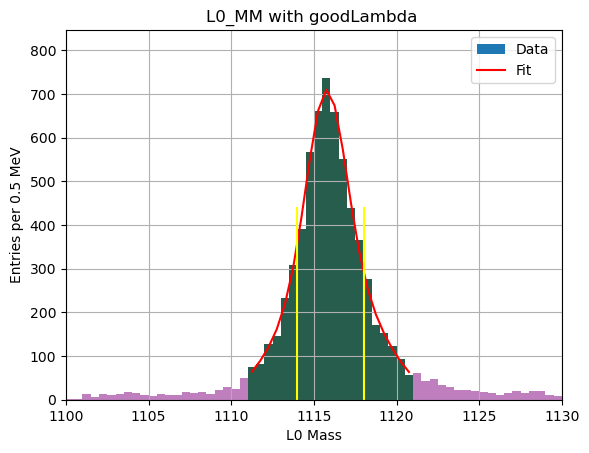

In [35]:
fig, ax = fit_model_L.plot(fit_result_L, binsL, nCL, title='L0_MM with goodLambda ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)
ax.hist(L0_MM[temp_cut], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
ax.hist(L0_MM[good_Lambda], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()

### Lambda LL (L0_LL)

### Fit using Double Gaussian plus Explonential

Now lets do the random search / also use things in a better and (hacky) way. 

The fit is for L0 with the following cuts 

`good_LambdaLL`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & LL`


In [36]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 664.2769655531326
Best initial parameters: {'n_s': 1385.0790385768166, 'f': 0.303591871056757, 'n_b': 87.88514506952558, 'mu1': 1113.81713770655, 'mu2': 1113.7663062500658, 'sigma1': 16.931615057093765, 'sigma2': 12.458653370834252, 'A': -0.05264451882539123, 'b': 0.6601807642333879}
15143.11972876297, 0.9377466975004487, 87.23282942565672, 289.93323873512475, 1115.7899732798999, 1183.6386838910037, 1.4266750302187154, -0.05264451882539123, 78.73692196081359>


We can use these values as a good initial guess list 

In [37]:
root_name = "_LL"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaLL], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [1828.0599366650097, 0.4941768942938372, -22732.448819532376, 1115.813484591921, 1115.968219607668, 0.9105384655460779, 2.194006264575918, -0.04194529869310294, 1.5782139821288466] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=1034.1647357846027 f=0.65957633933352 n_b=-22732.45116034853 mu1=1115.7526609869326 mu2=1115.904218224469 sigma1=1.1037649568352879 sigma2=2.7614085299540334 A=-0.04194529869306367 b=-1.1448258842150598>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.25                       │              Nfcn = 367              │
│ EDM = 0.000174 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  1.034e3  │  0.034e3  │            │            │         │         │       │
│ 1 │ f      │   0.66    │   0.10    │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │-22.7325e3 │ 0.0014e3  │            │            │         │         │       │
│ 3 │ mu1    │ 1.11575e3 │ 0.00006e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.11590e3 │ 0.00022e3 │            │            │         │         │       │
│ 5 │ sigma1 │    1.1    │    0.1    │            │            │         │         │       │
│ 6 │ sigma2 │    2.8    │    0.5    │            │            │         │         │       │
│ 7 │ A      │   -0.0    │    1.4    │            │            │         │         │       │
│ 8 │ b      │   -1.14   │   0.35    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬──────────────────────────────────────────────────────────────────────────────────┐
│        │      n_s        f      n_b      mu1      mu2   sigma1   sigma2        A        b │
├────────┼──────────────────────────────────────────────────────────────────────────────────┤
│    n_s │ 1.18e+03    0.744     -0.0    0.207    -0.45    0.665     4.97      0.0    -2.17 │
│      f │    0.744  0.00967    -0.00    0.002   -0.004    0.009    0.045     0.00   -0.033 │
│    n_b │     -0.0    -0.00        2   -0.000     0.00   -0.000    -0.00       -0     0.00 │
│    mu1 │    0.207    0.002   -0.000  0.00401   -0.007    0.002    0.010    0.000   -0.007 │
│    mu2 │    -0.45   -0.004     0.00   -0.007   0.0468   -0.003    -0.03    -0.00     0.02 │
│ sigma1 │    0.665    0.009   -0.000    0.002   -0.003   0.0111    0.041    0.000   -0.032 │
│ sigma2 │     4.97    0.045    -0.00    0.010    -0.03    0.041    0.261     0.00    -0.17 │
│      A │      0.0     0.00       -0    0.000    -0.00    0.000     0.00        2    -0.00 │
│      b │    -2.17   -0.033     0.00   -0.007     0.02   -0.032    -0.17    -0.00    0.121 │
└────────┴──────────────────────────────────────────────────────────────────────────────────┘

again, lets plot the histogram and fit superimposed on the hitsogram for lambda with same cuts but without the mass cut.

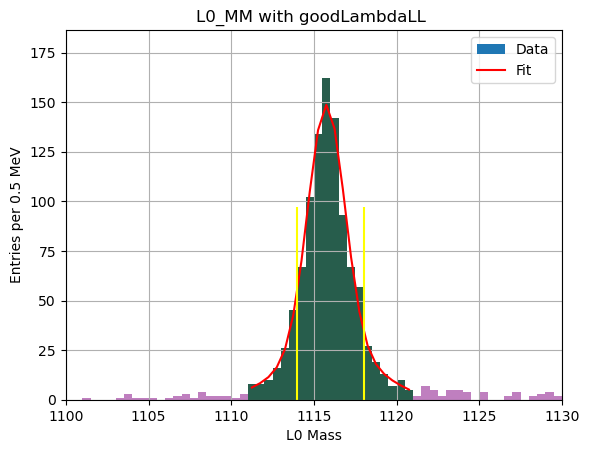

In [38]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaLL ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutLL], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaLL], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


## Lambda DD (L0_DD)

### Fit using Double Gaussian plus Exponential

lets again, start with some random search to acquire good initial guess

The fit is for L0 with the following cuts 

`good_LambdaDD`   = `(Lp_ProbNNp>0.2) & (L0_MM>1111) & (L0_MM<1121) & good_Delta_Z & good_Lambda_chisq_100 & DD`


In [39]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (1110, 1116),
    "mu2": (1110, 1116),
    "sigma1": (10, 20),
    "sigma2": (10, 20),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 2064.8171551610058
Best initial parameters: {'n_s': 9992.735064384671, 'f': 0.20411692821150057, 'n_b': 42.710590726528196, 'mu1': 1113.0995799749064, 'mu2': 1110.1352457790472, 'sigma1': 12.305281074560835, 'sigma2': 11.55497936481286, 'A': 0.061240134350778574, 'b': 0.17203374712124675}
11545.550211000576, 0.4294665425788566, -12660.924959347747, 1115.8898342152625, 1172.0784596745332, -2.0123100321399265, 99.96705324026888, 0.06124013435044397, 5.022209886337525>


Now we use this initial guess to do the fit 

In [40]:
root_name = "_DD"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(L0_MM[good_LambdaDD], bins=60, range=(1100,1130))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [9120.817313121128, 0.929509388491892, 6548.478148791116, 1115.7823039513255, 1499.4428273473834, 1.6580107105881836, 4.957241526156779, -0.030793060590727006, -0.050084638862231065] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=7545.3806909725745 f=0.5338891139097182 n_b=3431.6673953163054 mu1=1115.869620426922 mu2=1499.4428273473834 sigma1=1.6764477526703891 sigma2=-14.856448310640877 A=-0.042164952544651225 b=-0.00854861184985901>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.05                      │              Nfcn = 719              │
│ EDM = 3.47e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │  7.55e3   │  0.12e3   │            │            │         │         │       │
│ 1 │ f      │   0.534   │   0.013   │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │  3.43e3   │  0.35e3   │            │            │         │         │       │
│ 3 │ mu1    │ 1.11587e3 │ 0.00004e3 │            │            │         │         │       │
│ 4 │ mu2    │ 1.4994e3  │ 0.0014e3  │            │            │         │         │       │
│ 5 │ sigma1 │   1.68    │   0.05    │            │            │         │         │       │
│ 6 │ sigma2 │  -0.01e3  │  0.23e3   │            │            │         │         │       │
│ 7 │ A      │   -0.0    │    1.4    │            │            │         │         │       │
│ 8 │ b      │  -0.009   │   0.016   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│        │        n_s          f        n_b        mu1        mu2     sigma1     sigma2          A          b │
├────────┼────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    n_s │   1.41e+04  513.76e-3   -0.025e6    -0.1696        0.0     3.0364         -0        0.0 -260.63e-3 │
│      f │  513.76e-3   0.000161   -3.32010   -0.01e-3          0    0.42e-3   -3.37e-3          0   -0.03e-3 │
│    n_b │   -0.025e6   -3.32010   1.25e+05     1.0988        0.0   -13.9258          0       -0.0    1.53413 │
│    mu1 │    -0.1696   -0.01e-3     1.0988    0.00162     0.0000    -0.0000    -0.0074     0.0000    0.37e-3 │
│    mu2 │        0.0          0        0.0     0.0000          2     0.0000        0.0          0          0 │
│ sigma1 │     3.0364    0.42e-3   -13.9258    -0.0000     0.0000    0.00244    -0.0100     0.0000   -0.13e-3 │
│ sigma2 │         -0   -3.37e-3          0    -0.0074        0.0    -0.0100   5.38e+04       -0.0   -4.09e-3 │
│      A │        0.0          0       -0.0     0.0000          0     0.0000       -0.0          2          0 │
│      b │ -260.63e-3   -0.03e-3    1.53413    0.37e-3          0   -0.13e-3   -4.09e-3          0   0.000264 │
└────────┴────────────────────────────────────────────────────────────────────────────────────────────────────┘

and we do the same plots as before:

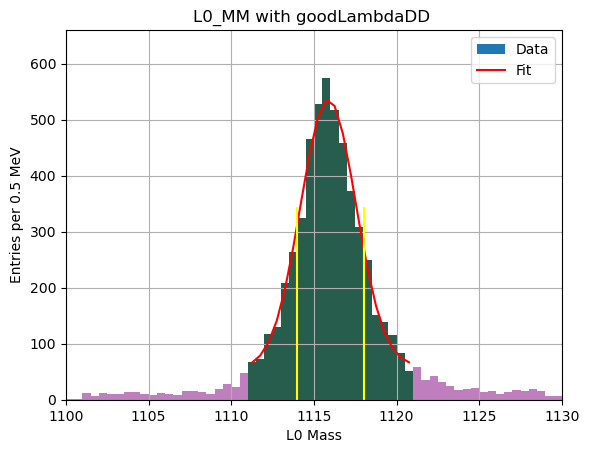

In [41]:
variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='L0_MM with goodLambdaDD ', xlabel='L0 Mass', ylabel='Entries per 0.5 MeV', vlines=[1114., 1118.], show_plot=False)

variables["ax" + root_name].hist(L0_MM[temp_cutDD], bins=60, range=(1100, 1130), color='purple', alpha=0.5)
variables["ax" + root_name].hist(L0_MM[good_LambdaDD], bins=60, range=(1100, 1130), color='g', alpha=0.5)

plt.show()


# B Fitting

First lets try to get a good B+ sample. we will try the following cuts

- p_ProbNNp
- good_Lambda
- prodProbKK > 0.2
- B_region

In [42]:

good_b = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)  & B_region
good_cand = good_Lambda & (prodProbKK > 0.4) & (p_ProbNNp > 0.5)
better_b = good_b & (Bu_IPCHI2_OWNPV < 5)
# add mass cut that Bu_MM is between 5200 and 5400
good_b_mass = Bu_MM[good_b]


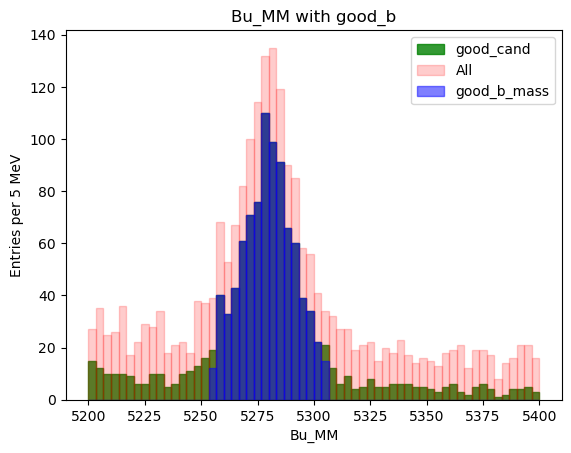

In [47]:
# Now lets plot the Bu_Mass for good_b

plt.figure()
plt.hist(Bu_MM[good_cand], bins=60, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.8, label='good_cand')
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(good_b_mass, bins=60, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.5, label='good_b_mass')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.legend()
plt.show()


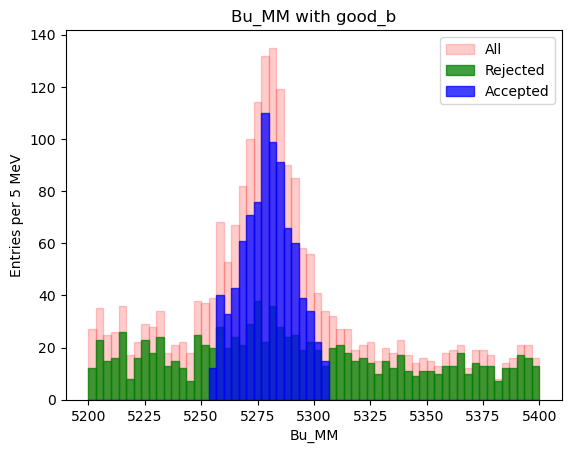

In [54]:
# Now lets plot the Bu_Mass for good_b

rejected = np.logical_not(good_cand)
plt.figure()
plt.hist(Bu_MM, bins=60, range=(5200, 5400), facecolor='r', edgecolor='r', alpha=0.2, label='All')
plt.hist(Bu_MM[rejected], bins=60, range=(5200, 5400), facecolor='g', edgecolor='g', alpha=0.75, label='Rejected')
plt.hist(Bu_MM[good_b], bins=60, range=(5200, 5400), facecolor='b', edgecolor='b', alpha=0.75, label='Accepted')
plt.xlabel('Bu_MM')
plt.ylabel('Entries per 5 MeV')
plt.title('Bu_MM with good_b')
plt.legend()
plt.show()


Now lets try to fit this plot. lets first try doublegaussian plus expoentnial

In [23]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "init_pars": None,
    "minuit_limits": None,
    "fit_model": None,
    "fit_result": None,
    "fig": None,
    "ax": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=40, range=(5240,5320))
plt.close()

# DoubleGaussian_plus_Exp [n_s, f, n_b, mu1, mu2, sigma1, sigma2, A, b] 
variables["init_pars" + root_name] = [9000, 0.3050696413197713, 0.06, 5249.469752417054, 5297.090841788354, 43.980247470343194, 40.79790976237721, 0.03215102477516779, 0.662131351551057
                                    ] ## good_LambdaLL

variables["minuit_limits" + root_name] = {
    "f": (0.0001, 0.9999),
}

variables["fit_model" + root_name] = DoubleGaussian_plus_Exp(variables["bins" + root_name], variables["nC" + root_name], variables["minuit_limits" + root_name])

variables["fit_result" + root_name] = variables["fit_model" + root_name].fit(variables["init_pars" + root_name])

# Print the fitted parameters
print("Fitted parameters:", variables["fit_result" + root_name].values)
variables["fit_result" + root_name]



Fitted parameters: <ValueView n_s=177772.95199384468 f=0.07210772940673575 n_b=-24186.743876424727 mu1=5000.463754578035 mu2=5893.672347480994 sigma1=-143.060418163935 sigma2=220.8622086388042 A=0.03215102477516779 b=-2.8974940291873907>


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 259.1                      │             Nfcn = 1136              │
│ EDM = 1.35e+13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ n_s    │ 1.7777e5  │ 0.0000e5  │            │            │         │         │       │
│ 1 │ f      │ 7.2108e-2 │ 0.0000e-2 │            │            │ 0.0001  │ 0.9999  │       │
│ 2 │ n_b    │ -2.4187e4 │ 0.0000e4  │            │            │         │         │       │
│ 3 │ mu1    │ 5.0005e3  │ 0.0000e3  │            │            │         │         │       │
│ 4 │ mu2    │ 5.8937e3  │ 0.0000e3  │            │            │         │         │       │
│ 5 │ sigma1 │ -1.4306e2 │ 0.0000e2  │            │            │         │         │       │
│ 6 │ sigma2 │ 2.2086e2  │ 0.0000e2  │            │            │         │         │       │
│ 7 │ A      │ 3.2151e-2 │ 0.0000e-2 │            │            │         │         │       │
│ 8 │ b      │  -2.8975  │  0.0000   │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

Now lets plot the fit.

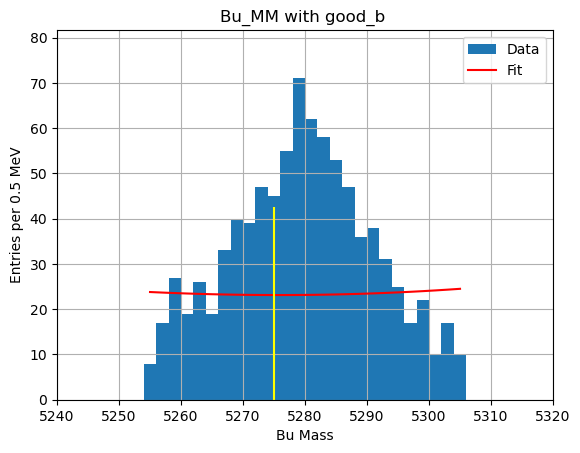

In [24]:
root_name = "_B"

variables["fig" + root_name], variables["ax" + root_name] = variables["fit_model" + root_name].plot(variables["fit_result" + root_name], variables["bins" + root_name], variables["nC" + root_name], title='Bu_MM with good_b ', xlabel='Bu Mass', ylabel='Entries per 0.5 MeV', vlines=[5275. , 5385.], show_plot=False)
plt.show()


It seems that I need some random search 

In [25]:
root_name = "_B"

# Define a dictionary to store your variables
variables = {
    "nC": None,
    "bins": None,
    "patches": None,
    "param_ranges": None,
    "random_search": None,
    "best_score": None,
    "best_params": None,
    "best_fit": None,
    "best_fit_m": None,
    "parsed_output": None,
}

# Use the class:
variables["nC" + root_name], variables["bins" + root_name], variables["patches" + root_name] = plt.hist(good_b_mass, bins=60, range=(1100,1130))
plt.close()

variables["param_ranges" + root_name] = {
    "n_s": (1000, 10000),
    "f": (0.001, 0.999),
    "n_b": (10, 100),
    "mu1": (5240,5320),
    "mu2": (5240,5320),
    "sigma1": (40, 50),
    "sigma2": (50, 40),
    "A": (-0.1, 0.1),
    "b": (-1, 1),
}

variables["random_search" + root_name] = RandomSearch(variables["bins" + root_name], variables["nC" + root_name], fit_class=DoubleGaussian_plus_Exp, search_ranges=variables["param_ranges" + root_name], num_searches=100)

# Perform the search
variables["best_score" + root_name], variables["best_params" + root_name], variables["best_fit" + root_name] = variables["random_search" + root_name].perform_search()

# Print the results
print("Best chi2:", variables["best_score" + root_name])
print("Best initial parameters:", variables["best_params" + root_name])

# Fit the best_fit with the best_params
best_params_list = [variables["best_params" + root_name][param] for param in ["n_s", "f", "n_b", "mu1", "mu2", "sigma1", "sigma2", "A", "b"]]
variables["best_fit_m" + root_name] = variables["best_fit" + root_name].fit(best_params_list)


# Print the fitted parameters in a nice format to copy-paste
variables["parsed_output" + root_name] = parse_best_fit_parameters(variables["best_fit_m" + root_name].values)
print(variables["parsed_output" + root_name])


Best chi2: 0.0
Best initial parameters: {'n_s': 7412.671191609704, 'f': 0.9834982984406373, 'n_b': 50.95922152060035, 'mu1': 5266.780870970071, 'mu2': 5305.429027772824, 'sigma1': 40.375730770690105, 'sigma2': 48.38560858620107, 'A': 0.07209260914463328, 'b': 0.7373960681827059}
7412.671191609704, 0.9834982984406373, 50.95922152060035, 5266.780870970071, 5305.429027772824, 40.375730770690105, 48.38560858620107, 0.07209260914463328, 0.7373960681827059>


## Invariant Masses

First, lets define the four momentums for our decay produces. we have different combinantions. the following table put a summary for that

| Combination        | Possible Resonance       
| ------------- |:-------------:| 
| K₁⁺ K₂⁺     |None
| Λ₋p      | Nucleon Resonances     
| Λ₋K₁⁺ | Hyperon Resonances     
| Λ₋K₂⁺ | Hyperon Resonances      
| pK₁⁺ | Hyperon Resonances     
| pK₂⁺ | Hyperon Resonances      
| Λ₋pK₁⁺ | Baryon Resonances      
| Λ₋pK₂⁺ | Baryon Resonances      
| pK₁⁺K₂⁺ | Baryon Resonances      
| Λ₋K₁⁺K₂⁺ | Baryon Resonances

In [26]:
K1_4vec  = vector.awk({"x":h1_PX, "y":h1_PY, "z":h1_PZ, "t":h1_PE}) # K+
K2_4vec  = vector.awk({"x":h2_PX, "y":h2_PY, "z":h2_PZ, "t":h2_PE}) # K+
p_4vec   = vector.awk({"x":p_PX,  "y":p_PY,  "z":p_PZ,  "t":p_PE}) # p
L0_4vec  = vector.awk({"x":L0_PX,  "y":L0_PY,  "z":L0_PZ,  "t":L0_PE}) # L0

KK_4vec  = K1_4vec+K2_4vec
pKK_4vec = p_4vec+KK_4vec 

LbarpKp_4vec = L0_4vec + p_4vec + K2_4vec

KK_mass  = np.sqrt(np.square(KK_4vec.t)  - np.square(KK_4vec.x)  - np.square(KK_4vec.y)  - np.square(KK_4vec.z))

pKK_mass = np.sqrt(np.square(pKK_4vec.t) - np.square(pKK_4vec.x) - np.square(pKK_4vec.y) - np.square(pKK_4vec.z))

LbarpKp_mass = np.sqrt(np.square(LbarpKp_4vec.t) - np.square(LbarpKp_4vec.x) - np.square(LbarpKp_4vec.y) - np.square(LbarpKp_4vec.z))

In [27]:
print(K1_4vec)
print(K2_4vec)

[{x: -2.3e+03, y: 664, z: 3.32e+04, t: 3.33e+04}, ..., {x: -3.42e+03, ...}]
[{x: -2.5e+03, y: 2.74e+03, z: 5.38e+04, t: 5.39e+04}, ..., {x: -1.46e+03, ...}]


### Vector meson resonances

#### K+K+

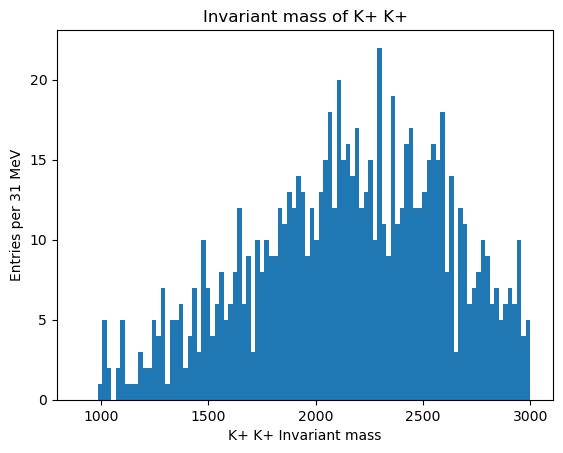

In [28]:
# plt the K+ K+ invaarint mass histogram
plt.figure()
plt.hist(KK_mass[good_b], bins=100, range=(900, 3000))
plt.title("Invariant mass of K+ K+")
plt.xlabel("K+ K+ Invariant mass")
plt.ylabel("Entries per 31 MeV")
plt.show()

### Hyperon resonances

#### $\Lambda_{\bar{\phantom{x}}}$ K+

In [29]:
# define a four momentum for L0 K+ system (First K+)
L0Kp_4vec = L0_4vec + K1_4vec
    
L0Kp1_M = np.sqrt(np.square(L0Kp_4vec.t) - np.square(L0Kp_4vec.x) - np.square(L0Kp_4vec.y) - np.square(L0Kp_4vec.z))    

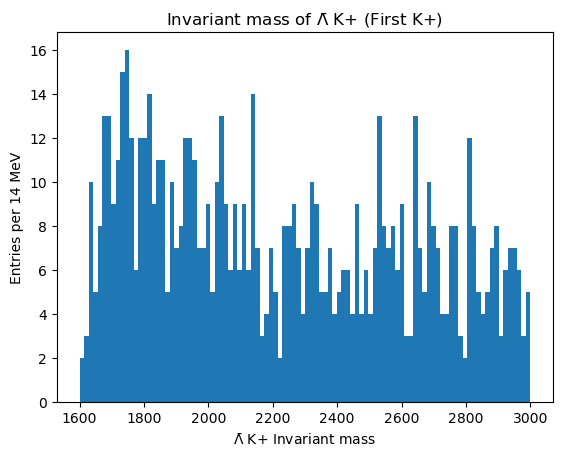

In [30]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(L0Kp1_M[good_b], bins=100, range=(1600, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ K+ (First K+)")
plt.xlabel(r"$\Lambda$̄ K+ Invariant mass")
plt.ylabel("Entries per 14 MeV")
plt.show()



In [31]:
# define a four momentum for L0 K+ system (First K+)
L0Kp_4vec = L0_4vec + K2_4vec
    
L0Kp2_M = np.sqrt(np.square(L0Kp_4vec.t) - np.square(L0Kp_4vec.x) - np.square(L0Kp_4vec.y) - np.square(L0Kp_4vec.z))    

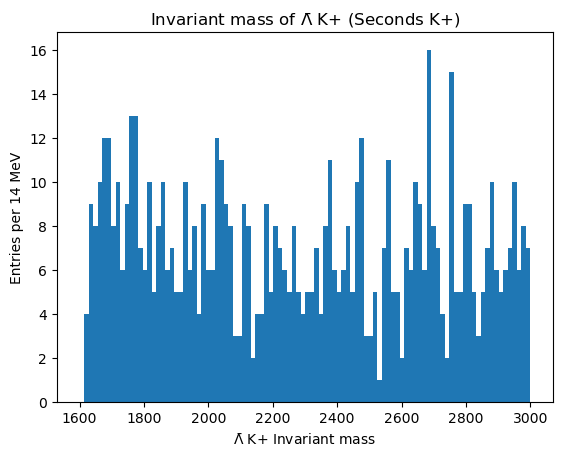

In [32]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(L0Kp2_M[good_b], bins=100, range=(1600, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ K+ (Seconds K+)")
plt.xlabel(r"$\Lambda$̄ K+ Invariant mass")
plt.ylabel("Entries per 14 MeV")
plt.show()



### Excited Nucleons

#### $\Lambda_{\bar{\phantom{x}}}$ p

Now, we study the excited nucleons from $\Lambda_{\bar{\phantom{x}}}$ p

In [33]:
# define a four momentum for L0 p system 
Lbarp_4vec = L0_4vec + p_4vec

Lbarp_mass = np.sqrt(np.square(Lbarp_4vec.t) - np.square(Lbarp_4vec.x) - np.square(Lbarp_4vec.y) - np.square(Lbarp_4vec.z))


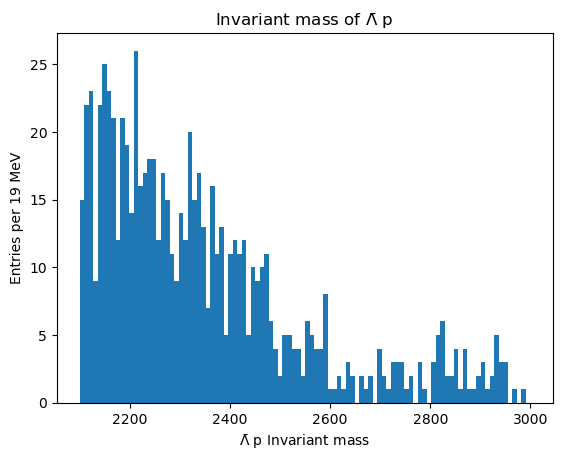

In [34]:
# plt the L0 K+ invaarint mass histogram
plt.figure()
plt.hist(Lbarp_mass[good_b], bins=100, range=(2100, 3000))
plt.title(r"Invariant mass of $\Lambda$̄ p ")
plt.xlabel(r"$\Lambda$̄ p Invariant mass")
plt.ylabel("Entries per 19 MeV")
plt.show()



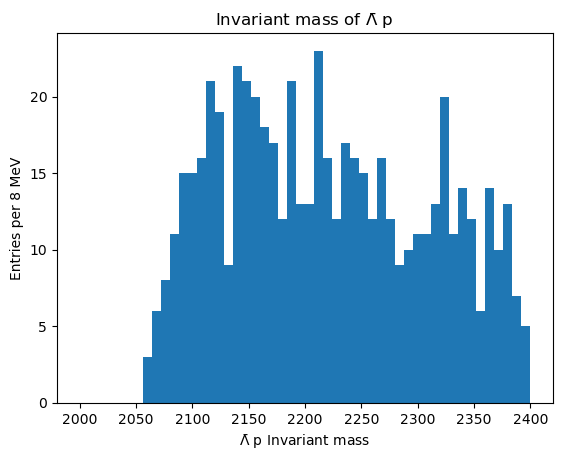

In [35]:
# plt the L0 p invaarint mass histogram
plt.figure()
plt.hist(Lbarp_mass[good_b], bins=50, range=(2000, 2400))
plt.title(r"Invariant mass of $\Lambda$̄ p ")
plt.xlabel(r"$\Lambda$̄ p Invariant mass")
plt.ylabel("Entries per 8 MeV")
plt.show()



### p K+

In [36]:
# define a four momentum for p K+ system (First K+)

pKp1_4vec = p_4vec + K1_4vec
pKp1_mass = np.sqrt(np.square(pKp1_4vec.t) - np.square(pKp1_4vec.x) - np.square(pKp1_4vec.y) - np.square(pKp1_4vec.z))


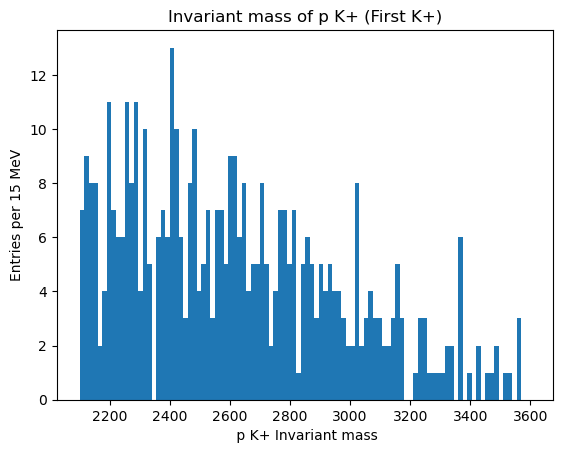

In [37]:
# plt the p K+ invaarint mass histogram (First K+)

plt.figure()
plt.hist(pKp1_mass[good_b], bins=100, range=(2100, 3600))
plt.title(r"Invariant mass of p K+ (First K+)")
plt.xlabel(r" p K+ Invariant mass")
plt.ylabel("Entries per 15 MeV")
plt.show()



In [38]:
# define a four momentum for p K+ system (Seconds K+)
pKp2_4vec = p_4vec + K2_4vec
pKp2_mass = np.sqrt(np.square(pKp2_4vec.t) - np.square(pKp2_4vec.x) - np.square(pKp2_4vec.y) - np.square(pKp2_4vec.z))

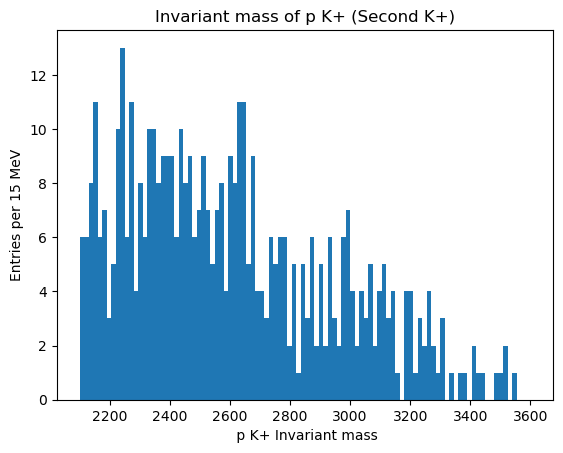

In [39]:
# plt the p K+ invaarint mass histogram (Second K+)

plt.figure()
plt.hist(pKp2_mass[good_b], bins=100, range=(2100, 3600))
plt.title(r"Invariant mass of p K+ (Second K+)")
plt.xlabel(r" p K+ Invariant mass")
plt.ylabel("Entries per 15 MeV")
plt.show()



### Λ p K⁺

In [40]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (First K+)
LbarpKp1_4vec = L0_4vec + p_4vec + K1_4vec
LbarpKp1_mass = np.sqrt(np.square(LbarpKp1_4vec.t) - np.square(LbarpKp1_4vec.x) - np.square(LbarpKp1_4vec.y) - np.square(LbarpKp1_4vec.z))



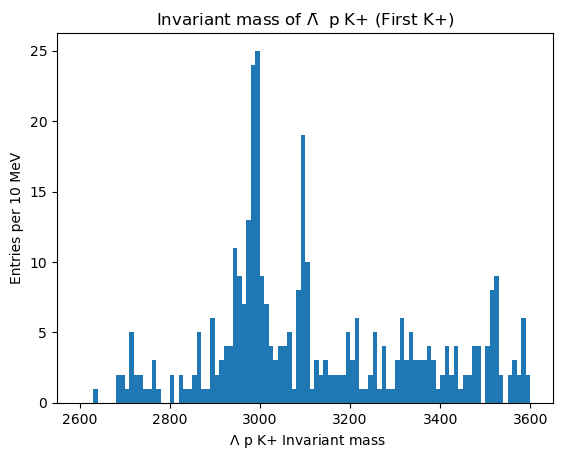

In [49]:
plt.figure()
plt.hist(LbarpKp1_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (First K+)")
plt.xlabel(r" $\Lambda$ p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


In [42]:
# Now lets add the Λ₋pK₁⁺ system and define a four momentum for it (Second K+)
LbarpKp2_4vec = L0_4vec + p_4vec + K2_4vec
LbarpKp2_mass = np.sqrt(np.square(LbarpKp2_4vec.t) - np.square(LbarpKp2_4vec.x) - np.square(LbarpKp2_4vec.y) - np.square(LbarpKp2_4vec.z))

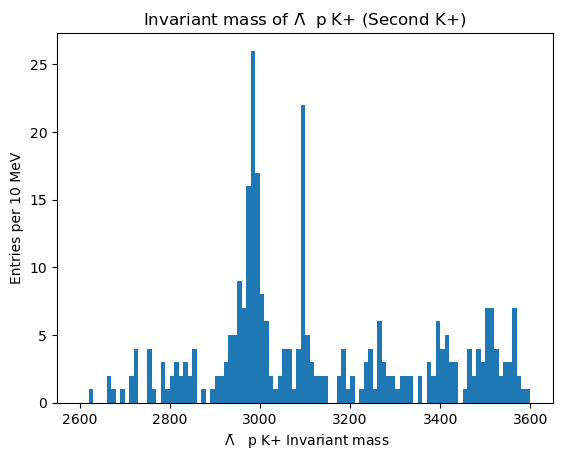

In [50]:
plt.figure()
plt.hist(LbarpKp2_mass[good_b], bins=100, range=(2600, 3600))
plt.title(r"Invariant mass of $\Lambda$̄  p K+ (Second K+)")
plt.xlabel(r" $\Lambda$̄   p K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


#### Λ K⁺ K⁺

In [53]:
# Lets define the four vector for the Λ K+ K+ system 
L0KpKp_4vec = L0_4vec + K1_4vec + K2_4vec
L0KpKp_mass = np.sqrt(np.square(L0KpKp_4vec.t) - np.square(L0KpKp_4vec.x) - np.square(L0KpKp_4vec.y) - np.square(L0KpKp_4vec.z))

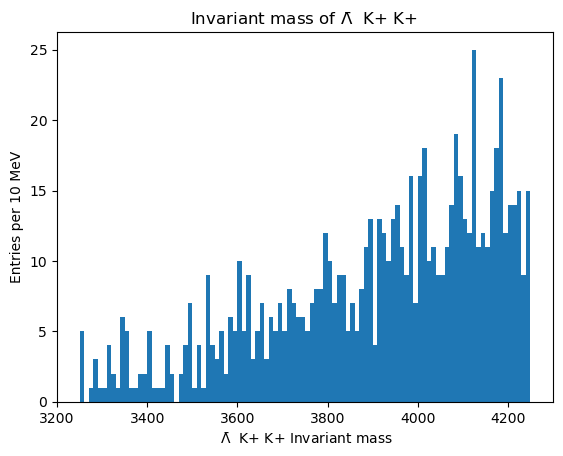

In [58]:
plt.figure()
plt.hist(L0KpKp_mass[good_b], bins=100, range=(3250, 4250))
plt.title(r"Invariant mass of $\Lambda$̄  K+ K+ ")
plt.xlabel(r" $\Lambda$̄  K+ K+ Invariant mass")
plt.ylabel("Entries per 10 MeV")
plt.show()


#### p K⁺ K⁺

In [59]:
# Lets define the four vector for the  p K+ K+ system
pKpKp_4vec = p_4vec + K1_4vec + K2_4vec
pKpKp_mass = np.sqrt(np.square(pKpKp_4vec.t) - np.square(pKpKp_4vec.x) - np.square(pKpKp_4vec.y) - np.square(pKpKp_4vec.z))

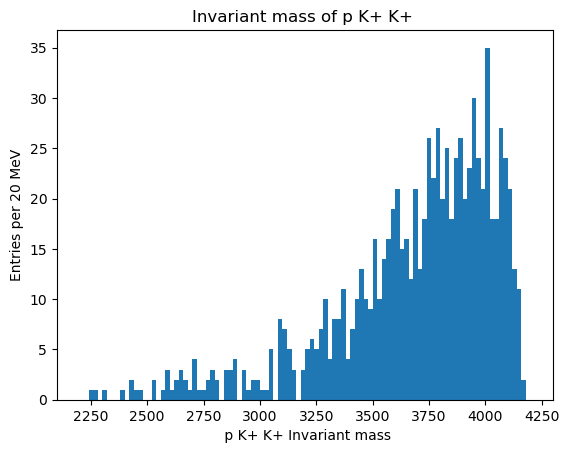

In [64]:
plt.figure()
plt.hist(pKpKp_mass[good_b], bins=100, range=(2200, 4200))
plt.title(r"Invariant mass of p K+ K+ ")
plt.xlabel(r" p K+ K+ Invariant mass")
plt.ylabel("Entries per 20 MeV")
plt.show()
